In [64]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm

import matplotlib as mpl
import matplotlib.pylab as plt

import seaborn as sns

# Table of Contents
## 1. Data for Regression
* 1.1. Boston House Prices
* 1.2. Diabetes Data
* 1.3. Make Regression

## 2. Theoretical Background
* 2.1. Bias Augmentation
* 2.2. OLS
* 2.3. Normal Equation

## 3. Linear Regression in Python
* 3.1. Numpy
* 3.2. Scikit-Learn
* 3.3. StatsModels

## 4. Geometry of Regression Analysis
* 4.1. Vector Space of Regression
* 4.2. Residual Matrix & Projection Matrix

## 5. Partial Regression
* 5.1. Basic Idea
* 5.2. Frisch-Waugh-Lovell Theorem
* 5.3. Partial Regression Plot
* 5.4. CCPR Plot

## 6. Probabilistic Linear Regression
* 6.1. Bootstrapping
* 6.2. Probabilistic Linear Regression Model
* 6.3. Linear Regression with MLE
* 6.4. Distribution of the Residual, $e$
* 6.5. Standard Error of Regression Coefficient
* 6.6. Single Coefficient t-test
* 6.7. Loss-of-Fit test (regression F-test)

## 7. Leverage
* 7.1. Leverage: influence of a single sample
* 7.2. Calculate Leverage with `StatsModels`
* 7.3. Visualize the Influence of the Leverage

## 8. Outliers
* 8.1. Standardized Residual
* 8.2. Calculate Standardized Residual with `StatsModels`
* 8.3. Cook's Distance
* 8.4. Example - Boston House Price dataset

# 1. Data for Regression
## 1.1. Boston House Prices

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


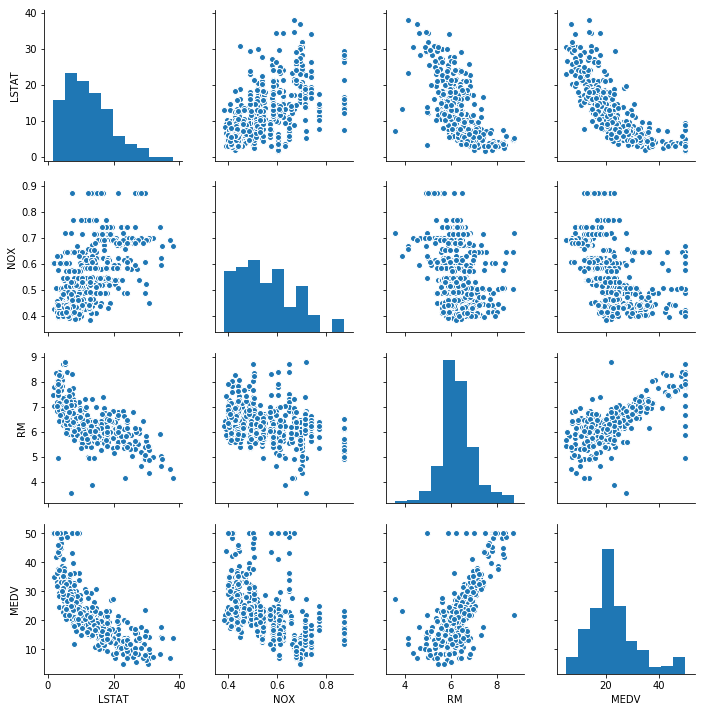

In [12]:
cols = ["LSTAT", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols])
plt.show()

## 1.2. Diabetes Data
* Target
  * quantitative measure of disease progression one year after baseline
* Feature
  * age
  * sex
  * body mass index
  * average blood pressure
  * six blood serum measurements

In [36]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=diabetes.feature_names),
                pd.DataFrame(diabetes.target, columns=["y"])],
               axis=1)
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [37]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


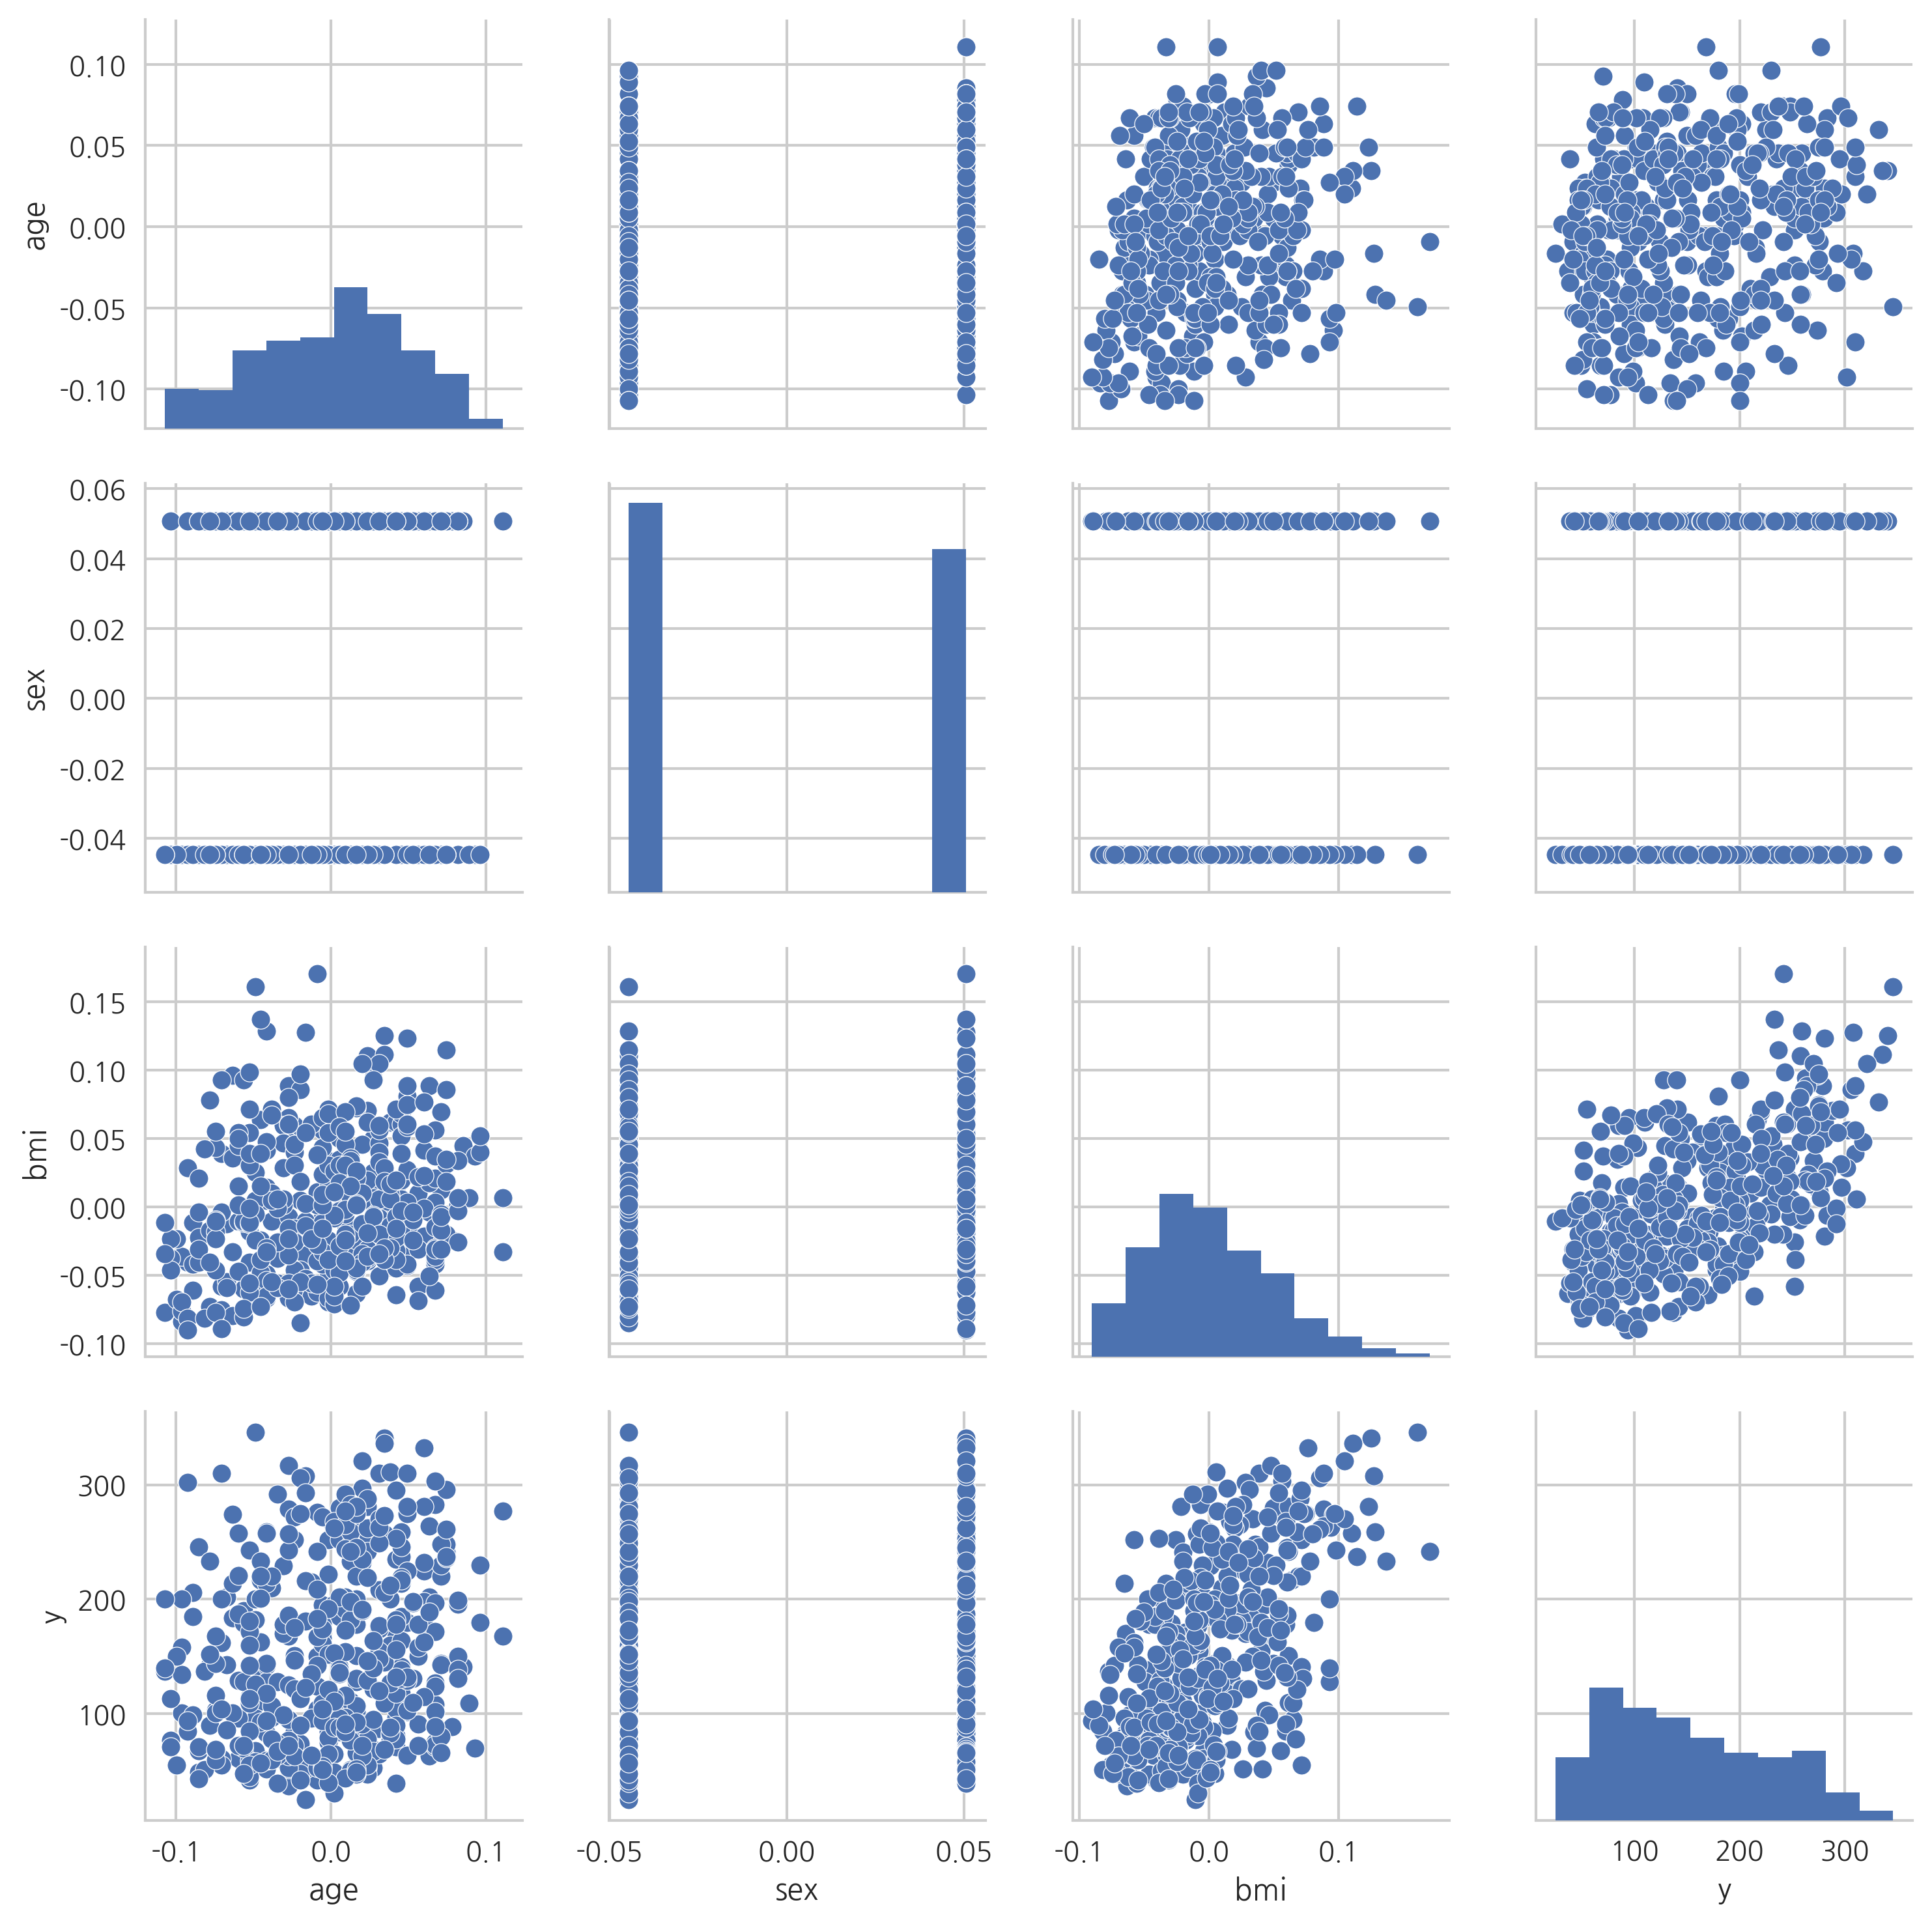

In [38]:
sns.pairplot(df[["age", "sex", "bmi", "y"]])
plt.show()

## 1.3. Make Regression

* **Command**
  * `X, y = make_regression(...)`
  * OR `X, y, w = make_regression(..., coef=True, ...)`

* **Parameters**
  * `n_samples` : integer (default=100)
  * `n_features` : integer (default=100)
  * `n_targets` : integer (default=1)
  * `bias` : real (default=0.0)
  * `noise` : real (default=0.0) **stdev of $\epsilon$**
  * `coef` : boolean (default=False) **if True, return coefficients**
  * `random_state` : integer (default=None)
  
  * `n_informative` : integer (default=10)
  * `effective_rank`: integer OR None (default=None)
    * no. of mutually independent features
    * if None, they are all independent
  * `tail_strength` : real value in (0,1) (default=0.5)
    * The relative importance of the fat noisy tail of the singular values profile if effective_rank is not None
    
* **Return**
  * `X` : 2D Array [`n_samples`, `n_features`]
  * `y` : 1D Array [`n_samples`] OR 2D Array [`n_samples`, `n_targets`]
  * `coef` : 1D Array [`n_features`] OR 2D Array [`n_features`, `n_targets`]
    * returned only when `coef=True`

### Example 1

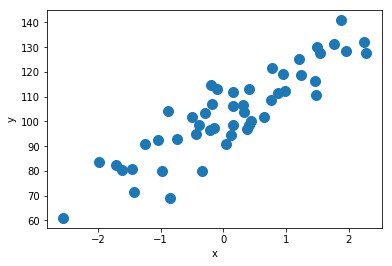

In [13]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10,
                          coef=True, random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Example 2 - `n_features=2`
* Target value: color

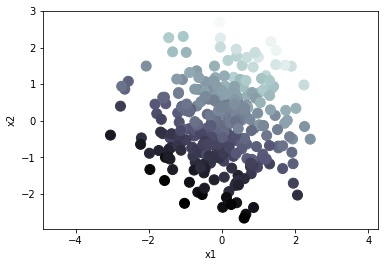

In [14]:
X, y, w = make_regression(n_samples=300, n_features=2, noise=10, 
                          coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

### Example 3 - `n_features=2`, `n_informative=1`

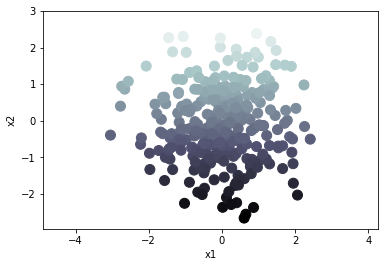

In [15]:
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1, 
                          noise=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

### Example 4 - `tail_strength=0`

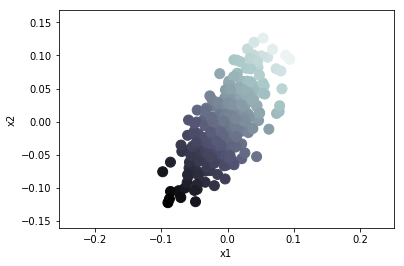

In [16]:
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, 
                          tail_strength=0, coef=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

# 2. Theoretical Background

* linear regression analysis
  * $w_0, \cdots, w_D$: coefficient of $f(x)$ OR **parameter** of the model

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx $$

## 2.1. Bias Augmentation
* To simplify calculation, add **1 vector** in feature matrix
$$
x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
$$

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
$$

* As a result,

$$ f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
= 
\begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_D
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_D
\end{bmatrix}
= x_a^T w_a = w_a^T x_a
$$

* **Bias Augmentation using `statsmodels`**

```python

import statsmodels.api as sm

X = sm.add_constant(X0)

```

## 2.2. OLS
* OLS(Ordinary Least Squares) - minimizes RSS(Residual Sum of Squares)
* Step 1.

$$ \hat{y} = Xw $$

$$ e = {y} - \hat{y} = y - Xw $$

* Step 2.

$$\begin{eqnarray}
\text{RSS}
&=&  e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$

* Step 3.

$$ \dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w = 0$$

* Step 4. 

$$ X^TX w^{\ast} = X^T y $$

* Step 5.

$$  w^{\ast} = (X^TX)^{-1} X^T y $$

### Solution exists because...
* Step 1. $(X^TX)^{-1}$ exists & $w^{\ast}$ is minimum (not max) $\rightarrow$ $X^TX$ is positive definite
* Step 2. $X^TX$ is positive definite $\rightarrow$

$$ v^TX^TXv > 0  \text{  for every non-zero vector   } v $$ 

$$ v^TX^TXv = 0 \;\; \leftrightarrow \;\; v = 0 $$

* Step 3. Equivalently

$$ v^TX^TXv = (Xv)^T(Xv) = u^Tu > 0  $$

$$ v^TX^TXv = 0 \;\; \leftrightarrow \;\; u = 0 $$

$$ v=0  \;\; \leftrightarrow \;\; u = Xv = 0 $$

* Step 4. $Xv$ is linear combination of the column vectors of $X$

$$ 
Xv 
= \begin{bmatrix} c_1 & \cdots & c_D \end{bmatrix} \begin{bmatrix} v_1 \\ \vdots \\ v_D \end{bmatrix} 
= v_1 c_1 + \cdots + v_D c_D
$$

$$ Xv=0  \;\; \leftrightarrow \;\; v = 0 $$

* Step 5. This means that $X$ is full rank 

* **If features are linearly independent, solution exists**

## 2.3. Normal Equation
* **Normal Equation:**

$$ X^T y - X^TX w = 0 $$

$$ X^T (y - X w ) = 0 $$

$$ X^T e = 0 $$

* **From this,**
  * **(1) If $X$ is an augmented 1-vector, **
$$ \sum_{i=0}^N e_i = 0 $$

  * Proof of (1)
$$ c_1^T e = \mathbf{1}^T e = \sum_{i=0}^N e_i = 0 $$

  * **(2) Prediction for $\bar{x}$ = $\bar{y}$**
$$ \bar{y} = w^T \bar{x} $$

  * Proof of (2)
$$
\begin{eqnarray}
\bar{y} 
&=& \dfrac{1}{N}\mathbf{1}^T y \\
&=& \dfrac{1}{N}\mathbf{1}^T (Xw + e) \\
&=& \dfrac{1}{N}\mathbf{1}^TXw + \dfrac{1}{N}\mathbf{1}^Te \\
&=& \dfrac{1}{N}\mathbf{1}^TXw \\
&=& \dfrac{1}{N}\mathbf{1}^T \begin{bmatrix}c_1 & \cdots & c_M \end{bmatrix} w \\
&=& \begin{bmatrix}\dfrac{1}{N}\mathbf{1}^Tc_1 & \cdots & \dfrac{1}{N}\mathbf{1}^Tc_M \end{bmatrix} w \\
&=& \begin{bmatrix}\bar{c_1} & \cdots & \bar{c_M} \end{bmatrix} w \\
&=& \bar{x}^T w \\
\end{eqnarray}
$$

  * **Using (2), it can be shown that shifting the data (to make mean=0) does not affect the result

$$ y ' = y - \bar{y}, \;\; X' = X - \bar{X} $$

$$ \hat{y}' = X' w' $$ 

$$ \hat{y} - \bar{y} = (X - \bar{X})w' $$

$$ \hat{y} = Xw' $$
  

# 3. Linear Regression in Python
## 3.1. Numpy

### `make_regression`

In [21]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

### True Equation
$$ y = 100 + 80.7105 x + \epsilon $$

### 1. Direct Calculation
* Use $w^{\ast} = (X^TX)^{-1} X^T y$
* Result:
$$ \hat{y} = 102.0270 + 81.5975 x $$

In [24]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[102.02701439],
       [ 81.59750943]])

### 2. `lstsq` Command

In [25]:
w = np.linalg.lstsq(X, y)[0]
w

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[102.02701439],
       [ 81.59750943]])

### Comparison with the Data

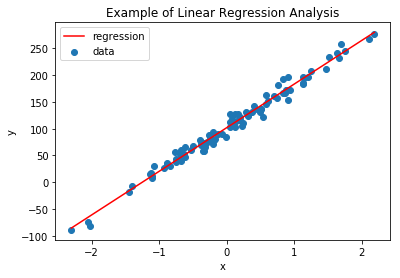

In [26]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

## 3.2. Scikit-Learn

### Method
```python
model = LinearRegression(fit_intercept=True)

model = model.fit(X,y)
# augmentation is not needed
# model.coef_ & model.intercept_ becomes available

y_new = model.predict(x_new)
```

### Example - Boston House Price

In [34]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

In [29]:
model_boston.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [30]:
model_boston.intercept_

36.49110328036104

### Comparison with the True Values

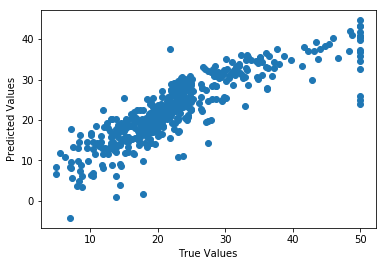

In [31]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"True Values")
plt.ylabel(u"Predicted Values")
plt.show()

## 3.3. StatsModels

### Method

```python
X = sm.add_constant(x)

model = OLS(y, X)

result = model.fit()

print(result.summary())

y_new = result.predict(x_new)
```

In [35]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          6.95e-135
Time:                        16:40:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

### Predict
* `dfx_new` and `dfX` should have the same format
* Let's make a prediction for the mean values of the features

In [39]:
x_new = dfX0.mean().values
x_new

array([3.59376071e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

* Now, make a dataframe that has the form of the original data
* When the data consists only of one row, set `has_constant="add"`

In [40]:
dfx_new = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T, 
                                       columns=boston.feature_names), 
                          has_constant="add")
dfx_new

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,3.593761,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063


In [41]:
result_boston2.predict(dfx_new)

0    22.532806
dtype: float64

* As proven with Normal Equation, this is same as the mean value of `y`

In [42]:
dfy.mean()

MEDV    22.532806
dtype: float64

### Comparison with the True Values

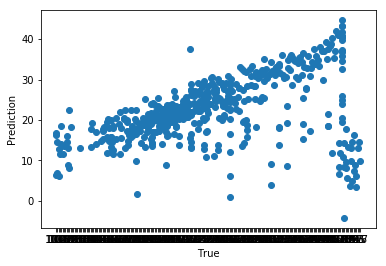

In [38]:
dfy_new = result_boston2.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"True")
plt.ylabel(u"Prediction")
plt.show()

### `RegressionResults` class
* Attribute 1, `resid`: residuals
* Attribute 2, `params`: parameters 

In [43]:
result_boston2.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [44]:
result_boston2.resid.head()

0   -6.008213
1   -3.429861
2    4.129768
3    4.791859
4    8.257118
dtype: float64

### `plot_regress_exog`
* analyzes the result of the regression

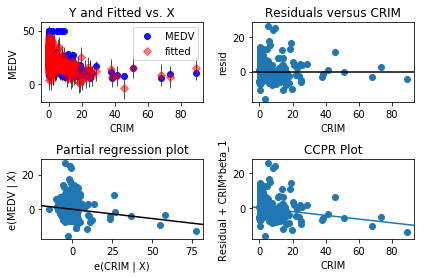

In [45]:
fig = sm.graphics.plot_regress_exog(result_boston2, "CRIM")
fig.suptitle("")
plt.show()

# 4. Geometry of Regression Analysis

## 4.1. Vector Space of Regression
* $\hat{y}$ lies in a vector space that has $c_1, \cdots, c_M$ as its basic vector

$$ 
\begin{eqnarray}
\hat{y} 
&=& Xw \\
&=& \begin{bmatrix} c_1 & \cdots & c_M \end{bmatrix} \begin{bmatrix} w_1 \\ \vdots \\ w_M \end{bmatrix} \\
&=& w_1 c_1 + \cdots + w_M c_M 
\end{eqnarray}
$$

* Residual vector $e$ is perpendicular to the vector space

<img src="https://datascienceschool.net/upfiles/99a909b0d8c74b1297ed2f97ed5aee0d.png">

## 4.2. Residual Matrix & Projection Matrix
* **Residual Matrix**: transforms $y$ into $e$
* **Projection Matrix**: transforms $y$ into $\hat{y}$ / a.k.a. **influence matrix** or **hat matrix**

$$ e = My $$

$$ \hat{y} = Hy $$

$$
\begin{eqnarray}
e 
&=& y - \hat{y} \\
&=& y - Xw \\
&=& y - X(X^TX)^{-1}X^Ty \\
&=& (I - X(X^TX)^{-1}X^T)y \\
&=& My \\
\end{eqnarray}
$$

$$
\begin{eqnarray}
\hat{y} 
&=& y - e \\
&=& y - My \\
&=& (I - M)y \\
&=& X(X^TX)^{-1}X^T y \\
&=& Hy \\
\end{eqnarray}
$$

### Result:

$$ H = X(X^TX)^{-1}X^T $$

$$ M = I - X(X^TX)^{-1}X^T $$

### Properties of $M$ and $H$

(1) Symmetric

$$ M^T = M $$

$$ H^T = H $$

(2) Idempotent

$$ M^2 = M $$

$$ H^2 = H $$

(3) $ MX = 0 $

(4) $ MH = HM = 0 $

(5) $ HX = X $$

(6) $ y^Ty = \hat{y}^T \hat{y} + e^T e $ 
  * $\rightarrow$ will be used in **ANOVA**

### Proof of the Properties

$$
\begin{eqnarray}
M^T 
&=& (I - X(X^TX)^{-1}X^T)^T \\
&=& I - X(X^TX)^{-T}X^T \\
&=& I - X((X^TX)^T)^{-1}X^T \\
&=& I - X(X^TX)^{-1}X^T \\
&=& M
\end{eqnarray}
$$

$$
\begin{eqnarray}
M^2 
&=& (I - X(X^TX)^{-1}X^T)(I - X(X^TX)^{-1}X^T) \\
&=& I - 2X(X^TX)^{-T}X^T + X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T\\
&=& I - X((X^TX)^T)^{-1}X^T \\
&=& M
\end{eqnarray}
$$

$$
\begin{eqnarray}
MX
&=& (I - X(X^TX)^{-1}X^T)X \\
&=& X - X(X^TX)^{-1}X^TX \\
&=& X - X\\
&=& 0
\end{eqnarray}
$$

$$
\begin{eqnarray}
MH 
&=& (I - X(X^TX)^{-1}X^T)X(X^TX)^{-1}X^T \\
&=& X(X^TX)^{-T}X^T - X(X^TX)^{-1}X^TX(X^TX)^{-1}X^T\\
&=& X(X^TX)^{-T}X^T - X(X^TX)^{-1}X^T\\
&=& 0
\end{eqnarray}
$$

$$ y = \hat{y} + e = Hy + My = (H + M)y $$

$$
\begin{eqnarray}
y^Ty 
&=& ((H + M)y)^T((H + M)y) \\
&=& y^T (H + M)^T (H + M)y \\
&=& y^T (H + M) (H + M)y \\
&=& y^T (H^2 + MH + HM + M^2)y \\
&=& y^T (H + M) y \\
&=& y^T H y + y^T M y \\
&=& y^T H^2 y + y^T M^2 y \\
&=& y^T H^T H y + y^T M^T M y \\
&=& (Hy)^T (Hy) + (My)^T (My) \\
&=& \hat{y}^T \hat{y} + e^T e \\
\end{eqnarray}
$$

# 5. Partial Regression

## 5.1. Basic Idea
* **Q. If we add another independent variable $x_2$, how will the weights change?**
* Case 1: Regression with $x_1$ only

$$ y = w_1 x_1 + e $$

$$ w_1 = (X_1^TX_1)^{-1}X_1^T y $$

* Case 2: Regression with $x_1$ and $x_2$

$$ y = w_1' x_1 + w_2' x_2 + e' $$

$$
\begin{bmatrix}
X_1 & X_2
\end{bmatrix}
\begin{bmatrix}
w'_1 \\ w'_2
\end{bmatrix}
=
\hat{y} = y - e'
$$

$$
\begin{bmatrix}
X_1^T \\ X_2^T
\end{bmatrix}
\begin{bmatrix}
X_1 & X_2
\end{bmatrix}
\begin{bmatrix}
w'_1 \\ w'_2
\end{bmatrix}
=
\begin{bmatrix}
X_1^T \\ X_2^T
\end{bmatrix}
y
-
\begin{bmatrix}
X_1^T \\ X_2^T
\end{bmatrix}
e'
=
\begin{bmatrix}
X_1^T \\ X_2^T
\end{bmatrix}
y
$$

$$
\begin{bmatrix}
X_1^TX_1 & X_1^TX_2 \\
X_2^TX_1 & X_2^TX_2 \\
\end{bmatrix}
\begin{bmatrix}
w'_1 \\ w'_2
\end{bmatrix}
=
\begin{bmatrix}
X_1^T \\ X_2^T
\end{bmatrix}
y
$$

$$
w'_1 = (X_1^TX_1)^{-1}X_1^T(y - X_2 w'_2) = (X_1^TX_1)^{-1}X_1^Ty - (X_1^TX_1)^{-1}X_1^T X_2 w'_2
$$

* $w_1 = w'_1$ only when
  * 1) $w'_2=0$ ($X_2$ has no correlation with $y$)
  * 2) $X_1^T X_2 = 0$ ($x_1$ has no correlation with $x_2$)

## 5.2. Frisch–Waugh–Lovell Theorem
> Given two independent variables, $x_1$ and $x_2$, $w_1$ should be obtained using
>
> $$ y = X_1 w_1 + X_2 w_2 + e $$
>
> $w_1$ obtained from the following equation has the same value
> 
> $$ M_{x_2} y = M_{x_2} X_1 w_1  + e' $$
>
> Where $M_{x_2}$ is the **residual matrix** of regression with $x_2$ only
>
> $$ M_{x_2} = I - (X_2^TX_2)^{-1}X_2^T $$
>
> $$ e' = M_{x_2}X_2 w_2  $$
>
> The above equation can be simplified as,
>
> $$ y^{\ast} = X_1^{\ast} w_1 + e' $$
>
> In a nutshell: **다른 독립 변수의 영향을 모두 제거한 후 남은 데이터만으로 회귀 분석을 한 결과는 모든 독립 변수를 같이 사용하여 회귀 분석한 결과와 같다.**

## 5.3. Partial Regression Plot
* Visualizes the influence of a specified feature
* a.k.a. Added Variable Plot

### Method
* $z$: specified feature, $x$: rest of the features, $y$: dependent variable
> 1. Linear regression of $y$ with $x$ $\rightarrow$ obtain the residual $y^*$
> 2. Lienar regression of $z$ with $x$ $\rightarrow$ obtain the residual $z^*$
> 3. Linear regression of $y^*$ with $z^*$ $\rightarrow$ scatter plot $z^*$ and $y^*$

### Example - Boston House Price Dataset

In [46]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

### `plot_regress_exog` command - Various analysis plots

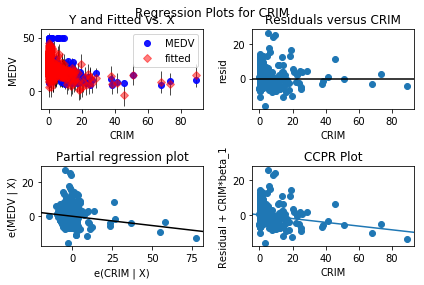

In [47]:
fig = sm.graphics.plot_regress_exog(result_boston, "CRIM")
plt.show()

### `sm.graphics.plot_partregress` command - PRP only
* Set `ret_coords=True` to return residuals

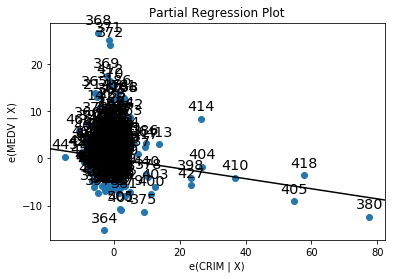

In [48]:
p, resids = sm.graphics.plot_partregress("MEDV", "CRIM", list(set(df.columns).difference(set(["MEDV", "CRIM"]))), 
                                         data=df, ret_coords=True)
plt.show()

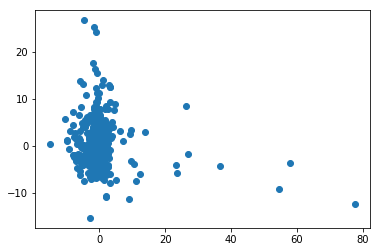

In [49]:
plt.plot(resids[0], resids[1], 'o')
plt.show()

### `sm.graphics.plot_partregress_grid` - PRP for every feature

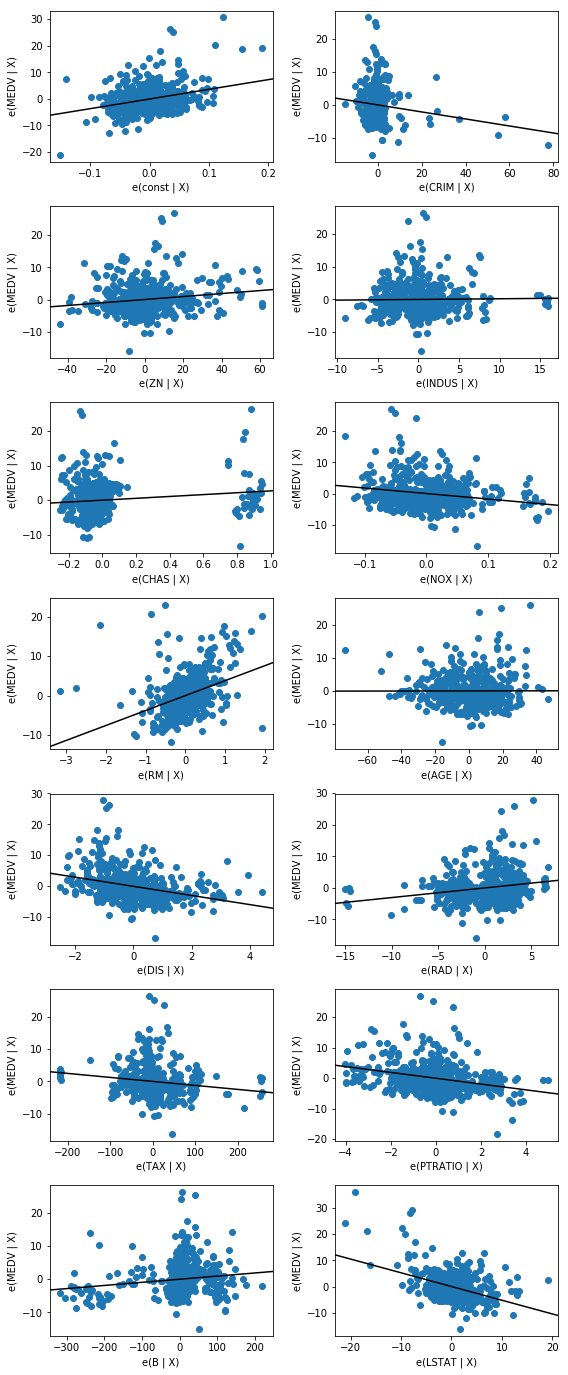

In [53]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

## 5.4. CCPR Plot
* Similar to PRP, CCPR(Component-Component Plus Residual) plot visualizes the influence of a specified feature

### Method
> 1. Solve the following regression
> $$ y = \hat{y} + e = w_1 x_1 +  w_2 x_2 +  \cdots + w_i x_i +  \cdots +  w_K x_K + e $$
> 
> 2. Scatter Plot the following
> $$ x_i \;\; \text{ vs } \;\; w_i x_i + e $$

### `sm.graphics.plot_ccpr` command - CCPR of a specified feature

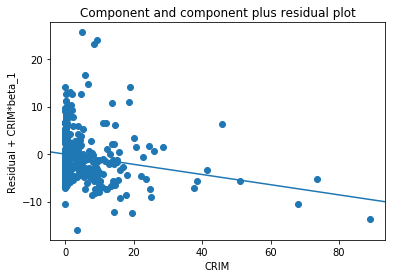

In [51]:
sm.graphics.plot_ccpr(result_boston, "CRIM")
plt.show()

### `sm.graphics.plot_ccpr_grid` command - CCPR of every feature

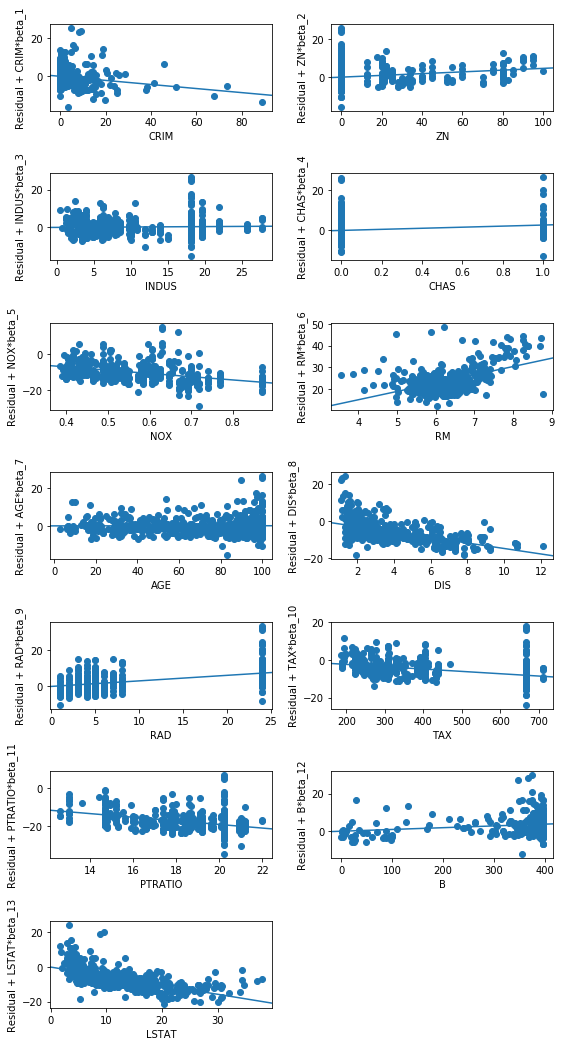

In [52]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

# 6. Probabilistic Linear Regression

## 6.1. Bootstrapping
* Linear Regression: the result is data-dependent
* Idea of Bootstrapping: solve regression for **re-sampled data**

### Method
>Select $N$ data from the original $N$ data, but allow repeated selection
>* (unordered resampling with replacement)
>* Theoretically, such method can create ${2N-1}\choose{N}$ new dataset


### Example - `make_regression` with $w_0=0$, $w_1=42.3855$

In [54]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=0)
coef

array(42.38550486)

In [55]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [56]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

### Bootstrapping for 1,000 times

In [57]:
%%time
N = 1000
params_c = np.zeros(N)
params_x1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_c[i] = r.params.const
    params_x1[i] = r.params.X1

CPU times: user 1.05 s, sys: 10.2 ms, total: 1.06 s
Wall time: 1.08 s


### Histogram of Weights

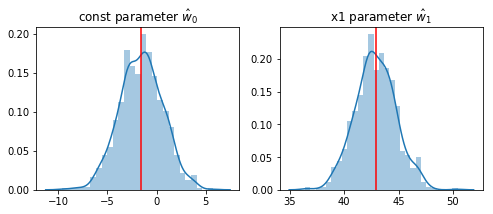

In [58]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_c, ax=ax1)
plt.axvline(params_c.mean(), c='r')
plt.title("const parameter $\hat{w}_0$")

ax2 = plt.subplot(122)
sns.distplot(params_x1, ax=ax2)
plt.axvline(params_x1.mean(), c='r')
plt.title("x1 parameter $\hat{w}_1$")
plt.show()

### Mean & Std of `c` and `x1`

In [61]:
params_c.mean(), params_c.std()

(-1.5490369928251166, 2.1701640090641146)

In [60]:
params_x1.mean(), params_x1.std()

(42.88451021895142, 1.8619291411965746)

### Comparison with the `StatsModels` regression result

In [62]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           2.21e-36
Time:                        15:28:36   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

## 6.2. Probabilistic Linear Regression Model
* Obtain statistical insight of the regression **w/o bootstrapping**
* Assume that the data is generated from a random variable

### Assumption 1. DIstribution of Disturbance, $ \epsilon_i$

#### 1-1. Linear Normal Distribution
> $y$ is conditionally normal (mean=$w^Tx$, var=$\sigma^2$)
>
> $$ y \sim \mathcal{N}(w^Tx, \sigma^2) $$
>
> the pdf of $y$ can be expressed as following, where $\theta=(w, \sigma^2)$
>
> $$ p(y \mid x, \theta) = \mathcal{N}(y \mid w^Tx, \sigma^2 ) $$
>
> introduce disturbance, $ \epsilon_i$
>
> $$ \epsilon_i = y - w^Tx $$
>
> **the pdf of $\epsilon_i$:**
>
> $$ p(\epsilon \mid \theta) = \mathcal{N}(0, \sigma^2 ) $$ <br>
>
> **NOTE: x and y themselves are not necessarily normally distributed**

#### 1-2. Exogeneity
> the expected value of $\epsilon_i$ is 0 (independent of the $x$)
>
> $$ \text{E}[\epsilon \mid x] = 0$$
> 
> $$ \text{E}[\epsilon] = 0$$
>
> $$ \text{E}[\epsilon x] = 0$$

#### 1-3.  Conditional Independence
> $$ \text{Cov}[\epsilon_i, \epsilon_j \mid x] = 0 \;\; (i,j=1,2,\ldots,N) $$ 
>
> $$ \text{E}[\epsilon_i \epsilon_j] = 0 \;\; (i,j=1,2,\ldots,N) $$
>
> $$\text{Cov}[\epsilon] = \text{E}[\epsilon^{} \epsilon^T] = \sigma^2 I $$

### Assumption 2. Independent Variable
> The feature matrix, $X$ should be full rank
>
> This means that the no. of independent components is same as the no. of features
>
> If $X$ is full rank, the covariance matrix, $X^TX$ is also full rank, and thus possess inverse

## 6.3. Linear Regression with MLE

### Likelihood

$$
\begin{eqnarray}
p(y_{1:N} \,\big|\, x_{1:N}, \theta)
&=& \prod_{i=1}^N \mathcal{N}(y_i \,\big|\, w^T x_i , \sigma^2) \\
&=& \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
\end{eqnarray}
$$

### Log-Likelihood

$$
\begin{eqnarray}
\text{LL}  
&=& \log p(y_{1:N} \,\big|\, x_{1:N}, \theta) \\
&=& \log \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
&=& -\dfrac{1}{2\sigma^2} \sum_{i=1}^N (y_i-w^T x_i)^2 - \dfrac{N}{2} \log{2\pi}{\sigma^2}  \\
\end{eqnarray}
$$

### Matrix Representation

$$
\text{LL}  =  -C_1 (y - Xw)^T(y-Xw) - C_0 = -C_1(w^TX^TXw -2 y^TXw + y^Ty) - C_0
$$

$$
C_1 =  -\dfrac{1}{2\sigma^2}
$$

$$
C_0 =  \dfrac{N}{2} \log{2\pi}{\sigma^2} 
$$

### Optimization & Obtain same result as with OLS

$$
\dfrac{\partial}{\partial w} \text{LL} = -C_1 \left( 2X^TX \hat{w} - 2X^Ty \right) = 0
$$

$$
\hat{w} = (X^TX)^{-1}X^T y
$$

Normal equation, as obtained with OLS

$$ X^TX \hat{w} - X^Ty = 0 $$

$$ X^T(X \hat{w} - y) = X^T(\hat{y} - y) = X^Te = 0 $$


## 6.4. Distribution of the Residual, $e$

### The residual, $e = y - \hat{w}^Tx$ is also normally distributed
> $$  \hat{y} = X\hat{w} = X (X^TX)^{-1}X^T y = Hy $$
>
> $$ e = y - \hat{y}= y - Hy = (I - H) y = My $$
>
> $$ e = My = M (Xw + \epsilon) = MXw + M\epsilon $$
> 
> $$ MX = 0 $$
>
> $$ e =  M\epsilon $$
>
> $e$ is linear transformation of $\epsilon$ $\rightarrow$ normal distribution

### `probplot` command

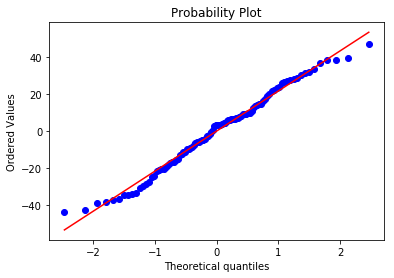

In [65]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

### normality test

In [67]:
import statsmodels.stats.api as sms
test = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  3.523
P-value     :  0.172


In [68]:
test = sms.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


### Expected value of $e$ is 0, independent of $x$

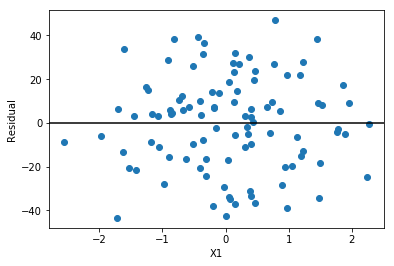

In [69]:
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

### Comparison between $0 < x < 1$ & $1 < x < 2$

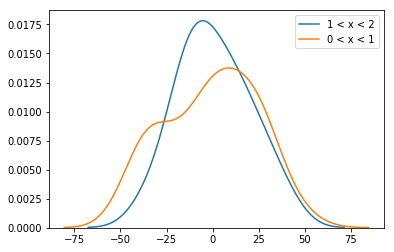

In [70]:
sns.kdeplot(result.resid[((1 < X0) & (X0 < 2)).flatten()], label="1 < x < 2")
sns.kdeplot(result.resid[((0 < X0) & (X0 < 1)).flatten()], label="0 < x < 1")
plt.legend()
plt.show()

## 6.5. Standard Error of Regression Coefficient

### $\hat{w}$ is unbiased estimate of $w$

* $\hat{w}$ is linear transformation of $\epsilon$ $\rightarrow$ $\hat{w}$ is also normally distributed

$$  
\begin{eqnarray}
\hat{w} 
&=& (X^TX)^{-1} X^T y \\
&=& (X^TX)^{-1} X^T (X w + \epsilon) \\
&=& w + (X^TX)^{-1} X^T \epsilon \\
\end{eqnarray}
$$

$$  
\begin{eqnarray}
\text{E}[\hat{w}] 
&=&  \text{E}[ w + (X^TX)^{-1} X^T \epsilon ] \\
&=&  w + (X^TX)^{-1} X^T \text{E}[ \epsilon ] \\
&=& w
\end{eqnarray}
$$

### Covariance of $\hat{w}$

$$
\begin{eqnarray}
\text{Cov}[\hat{w}] 
&=& E[(\hat{w} - w)(\hat{w} - w)^T] \\
&=& E[((X^TX)^{-1} X^T \epsilon)((X^TX)^{-1} X^T \epsilon)^T] \\
&=& E[(X^TX)^{-1} X^T \epsilon \epsilon^T X(X^TX)^{−1} ] \\
&=& (X^TX)^{-1} X^T E[\epsilon \epsilon^T] X(X^TX)^{−1} \\
&=& (X^TX)^{-1} X^T (\sigma^2 I) X(X^TX)^{−1} \\
&=& \sigma^2  (X^TX)^{-1}
\end{eqnarray}
$$

* Variance of $\hat{w}$ must be estimated from the variance of the residuals

$$ s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K} $$

* $N$: No. of Samples, $K$: No. of Parameters (if `bias=True`, $K=D+1$) 

* Hence, 

$$ \text{Cov}[\hat{w}] \approx s^2(X^TX)^{-1}$$

### Standard Error of Regression Coefficients
$$\text{Var}[\hat{w}_i]  = \left( \text{Cov}[\hat{w}] \right)_{ii} \;\; (i=0, \ldots, K-1)$$

$$ \sqrt{\text{Var}[\hat{w}_i]} \approx {se_i} = \sqrt{s^2 \big((X^TX)^{-1}\big)_{ii}} \;\; (i=0, \ldots, K-1)$$



### Normalized Parameter Error ~ $t_{N-K}$

$$  \dfrac{\hat{w}_i - w_i}{se_i} \sim t_{N-K} \;\; (i=0, \ldots, K-1)$$

## 6.6. Single Coefficient t-test
* Test Statistics: $\frac{\hat{w}_i}{se_i}$

* Null Hypothesis: $ H_0 : \;\; w_i = 0 \;\; (i=0, \ldots, K-1)$

* If p-value is larger than the significance level $\rightarrow$ that feature may be irrelevant

### Single Coefficient t-test in `StatsModels`

In [73]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           2.21e-36
Time:                        16:32:40   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

### `t-test` method for `RegressionResults` class
* Test for arbitrary null-hypothesis
* example) test for $ H_0: w_1 = 40 $

In [75]:
print(result.t_test("X1 = 40"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


## 6.7. Loss-of-Fit test (regression F-test)
* Test Statistic: `F-statistic`
* Null Hypothesis: $ H_0 : w_0  = w_1 = \cdots = w_{K-1} = 0 $
* p-value: `Prob (F-statistic)` $\rightarrow$ smaller the better

# 7. Leverage

## 7.1. Leverage: influence of a single sample

### Influence Matrix (a.k.a. hat matrix)

$$  \hat{y} =  Hy $$

$$ \hat{y}_i = h_{i1} y_1 + h_{i2} y_2 + \cdots + h_{ii} y_i + \cdots + h_{iN} y_N $$

$$ h_{ii} = 1, h_{ij} = 0 \; (\text{for } i \neq j) \;\; \rightarrow \;\; \hat{y}_i = y_i $$

### Leverage: diagonal component of the hat matrix, $h_{ii}$
* Leverage a.k.a. **self-influence**, **self-sensitivity**
> $$  h_{ii}=(H)_{ii} $$

* **Properties:**
> 1. $  0 \leq h_{ii} \leq 1 $
>
> 2. $  \text{tr}(H) = \sum_i^N h_{ii} = K $ ($K$: no. of parameters, bias included)

* **Average**
> $$ \bar{h}_{ii} \approx \dfrac{K}{N} $$

* **Normally, if $h_{ii}$ is 2~4 times larger than $\bar{h}_{ii}$ $\rightarrow$ leverage is said to be big**

## 7.2. Calculate Leverage with `StatsModels`
* Use `get_influence` method of `RegressionResults` class

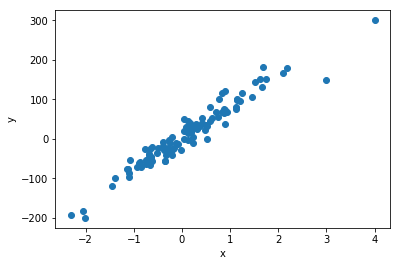

In [76]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, 
                              coef=True, random_state=1)

# Add outliers with high leverage
data_100 = (4, 300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [77]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           1.61e-61
Time:                        17:05:14   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

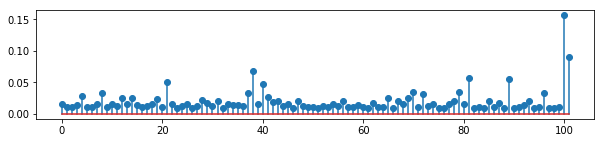

In [78]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

In [79]:
hat.sum()

2.0000000000000004

### Visualize high-leverage data points using circles

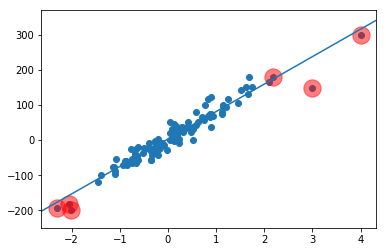

In [80]:
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.show()

## 7.3. Visualize the Influence of the Leverage

### Case 1: excluding high-leverage data point

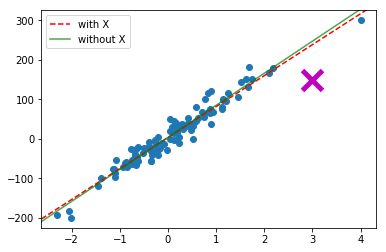

In [81]:
model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result2,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.legend([u"with X", u"without X"],
           loc="upper left")
plt.show()

### Case 2: excluding small-leverage data point

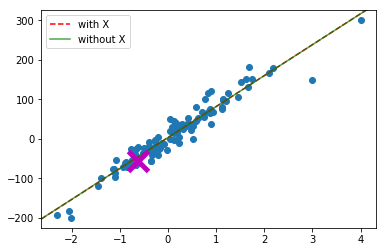

In [82]:
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, 
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result3, 
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.legend([u"with X", u"without X"], 
           loc="upper left")
plt.show()

### Case excluding high-leverage & small residual data point

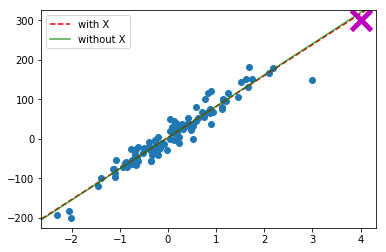

In [83]:
idx = np.array(list(range(100)) + [101])
model4 = sm.OLS(y[idx], X[idx, :])
result4 = model4.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, 
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result4, 
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[-2], y[-2], marker='x', c="m", ms=20, mew=5)
plt.legend([u"with X", u"without X"], 
           loc="upper left")
plt.show()

# 8. Outliers
* Data points with large residuals
* Since the size of the residuals depend on the variable, **standardized residual** must be calculated

## 8.1. Standardized Residual

$$ e = (I - H) \epsilon = M \epsilon $$

$$
\begin{eqnarray}
\text{Cov}[e] 
&=& \text{E}[M \epsilon\epsilon^T M^T] \\
&=& M \text{E}[\epsilon\epsilon^T] M^T \\
&=& M \sigma^2 I M^T \\
&=& \sigma^2MM^T \\
&=& \sigma^2MM \\
&=& \sigma^2M \\
&=& \sigma^2(I - H) \\
\end{eqnarray}
$$

* As a result,

$$ \text{Var}[e_i] = \sigma^2 (1 - h_{ii}) $$ 

$$ \text{Var}[e_i] \approx s^2 (1 - h_{ii}) $$ 

* Where,

$$ s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K} $$

* **Standardized Residual** (a.k.a. standardized residual OR normalized residual OR studentized residual)

$$ r_i = \dfrac{e_i}{s\sqrt{1-h_{ii}}} $$

## 8.2. Calculate Standardized Residual with `StatsModels`

### `resid` - residuals

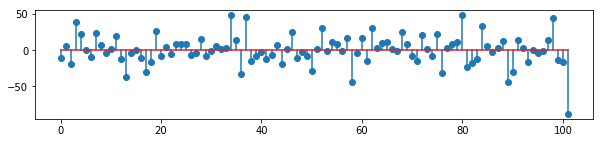

In [84]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.show()

### `resid_pearson` - standardized residuals

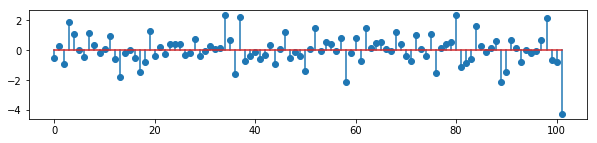

In [85]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.show()

## 8.3. Cook's Distance
* Metric to identify **high-leverage AND high-residual** data points

$$ D_i = \frac{r_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right] $$

* **Fox' Outlier Recommendation**:

$$ D_i > \dfrac{4}{N − K - 1} $$

### `plot_leverage_resid2` - Visualizes Leverage & Residuals

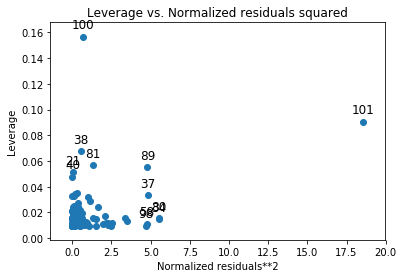

In [92]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

### `influence_plot` - Visualizes Cook's Distance with Bubbles

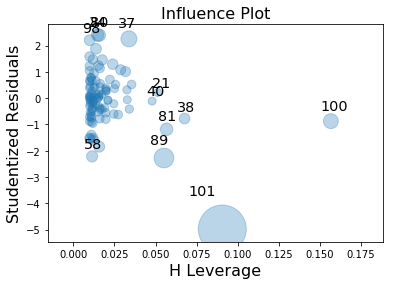

In [87]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

### Select Outliers based on Fox Recommendation

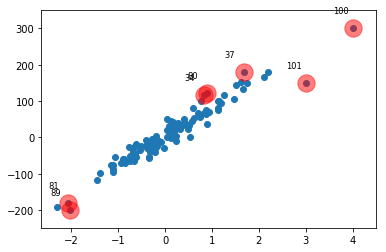

In [93]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, 
                    list(zip(X0[idx], y[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()

## 8.4. Example - Boston House Price dataset

In [89]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
pred = result_boston.predict(dfX)

influence_boston = result_boston.get_influence()
cooks_d2, pvals = influence_boston.cooks_distance
fox_cr = 4 / (len(y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]
# MEDV = 50 제거
idx = np.hstack([idx, np.where(boston.target == 50)[0]])
idx

array([214, 364, 365, 367, 368, 369, 370, 371, 372, 412, 161, 162, 163,
       166, 186, 195, 204, 225, 257, 267, 283, 368, 369, 370, 371, 372])

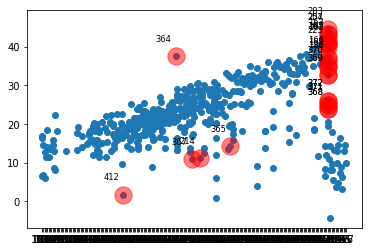

In [90]:
ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy.MEDV[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, 
                    list(zip(dfy.MEDV[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)

plt.show()

In [91]:
idx2 = list(set(range(len(dfX))).difference(idx))
dfX = dfX.iloc[idx2, :].reset_index(drop=True)
dfy = dfy.iloc[idx2, :].reset_index(drop=True)
model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     156.0
Date:                Tue, 24 Jul 2018   Prob (F-statistic):          2.67e-161
Time:                        17:14:33   Log-Likelihood:                -1285.3
No. Observations:                 485   AIC:                             2599.
Df Residuals:                     471   BIC:                             2657.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9296      4.108      4.608      0.0